<a href="https://colab.research.google.com/github/BluReBot/FaceAgeDetector/blob/main/AgeDetectorDeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from fastai.vision.all import *

# Face Age Detector

Upload a picture to see how old you look like!

In [36]:
import ipywidgets as widgets

In [37]:
uploadButton = widgets.FileUpload()


FileUpload(value={}, description='Upload')

In [49]:
image = PILImage.create(uploadButton.data[-1])
outPic = widgets.Output()
outPic.clear_output()
with outPic: display(image.to_thumb(256, 256))


In [39]:
def label_func(fname):
  return float(fname.name.split('_')[0])

In [40]:
model = load_learner("/content/magicFaceModel.pkl")
pred, a, b = model.predict(image)


(17.515865325927734)

17.515865325927734

In [42]:
outputLabel = widgets.Label()
outputLabel.value = f"You look like a(n) {round(pred[0])} year old."

Label(value='You look like a(n) 18 year old.')

In [43]:
def onClick(change):
  image = PILImage.create(uploadButton.data[-1])
  outPic.clear_output()
  with outPic: display(image.to_thumb(256, 256))
  pred, a, b = model.predict(image)
  outputLabel.value = f"You look like a {round(pred[0])} year old."

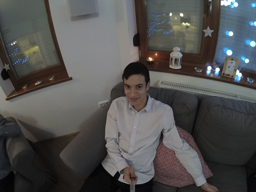

In [44]:
detectButton = widgets.Button(description = "Detect")
detectButton.on_click(onClick)


In [50]:
display(widgets.VBox([uploadButton, outPic, detectButton, outputLabel]))